<a href="https://colab.research.google.com/github/larrymoreorless/Machine-Learning/blob/master/view_activation_layers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.preprocessing import image
from keras.applications.vgg19 import VGG19
from keras.preprocessing.image import ImageDataGenerator
from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.applications.vgg19 import preprocess_input, decode_predictions
from keras import backend as K
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import os
import zipfile
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

Using TensorFlow backend.


In [2]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2019-07-02 21:30:36--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.142.128, 2607:f8b0:400e:c08::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.142.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M  89.1MB/s    in 0.7s    

2019-07-02 21:30:37 (89.1 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [0]:
local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

dir = '/tmp/cats_and_dogs_filtered'

train_data = os.path.join(dir, 'train')
val_data = os.path.join(dir, 'validation')

train_cats = os.path.join(train_data, 'cats')
train_dogs = os.path.join(train_data, 'dogs')
val_cats = os.path.join(val_data, 'cats')
val_dogs = os.path.join(val_data, 'dogs')

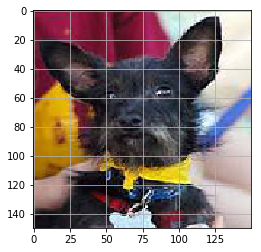

In [4]:
dog_img1 = '/tmp/cats_and_dogs_filtered/validation/dogs/dog.2001.jpg'
dog_img2 = '/tmp/cats_and_dogs_filtered/validation/dogs/dog.2002.jpg'
dog_img3 = '/tmp/cats_and_dogs_filtered/validation/dogs/dog.2003.jpg'
dog_img4 = '/tmp/cats_and_dogs_filtered/validation/dogs/dog.2004.jpg'
dog_img5 = '/tmp/cats_and_dogs_filtered/validation/dogs/dog.2005.jpg'
dog_img6 = '/tmp/cats_and_dogs_filtered/validation/dogs/dog.2006.jpg'
dog_img7 = '/tmp/cats_and_dogs_filtered/validation/dogs/dog.2007.jpg'
dog_img8 = '/tmp/cats_and_dogs_filtered/validation/dogs/dog.2008.jpg'
dog_img9 = '/tmp/cats_and_dogs_filtered/validation/dogs/dog.2009.jpg'
dog_img10 = '/tmp/cats_and_dogs_filtered/validation/dogs/dog.2010.jpg'


img = image.load_img(dog_img9, target_size=(150, 150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.

plt.imshow(img_tensor[0])
plt.grid(None)
plt.show()

In [5]:
model = VGG19(weights = 'imagenet')

#model.summary()

W0702 21:30:39.851245 140618826487680 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0702 21:30:39.900434 140618826487680 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0702 21:30:39.908824 140618826487680 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0702 21:30:39.966993 140618826487680 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



574717952/574710816 [==============================] - 18s 0us/step


W0702 21:30:59.335173 140618826487680 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0702 21:30:59.336752 140618826487680 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:181: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.



In [0]:
last_conv = model.get_layer('block5_conv3')

In [0]:
def superimposed(img_path, heatmap):
  
  img = cv2.imread(img_path)
  
  heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
  
  heatmap = np.uint8(255 * heatmap)
  
  heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
  
  superimposed_image = heatmap * 0.4 + img
  
  cv2_imshow(superimposed_image)

In [0]:
def process_image(img_path, idx=0):
  img = image.load_img(img_path, target_size=(224, 224))
  
  #show initial image
  plt.imshow(img)
  plt.grid(None)
  plt.show()
  
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)
  
  preds = model.predict(x)
  print('Predicted:', decode_predictions(preds, top=3)[0])
  
  class_index = np.argsort(preds[0])[-(1+idx)]

  class_output = model.output[:, class_index]
  
  grads = K.gradients(class_output, last_conv.output)[0]

  pooled_grads = K.mean(grads, axis=(0, 1, 2))

  iterate = K.function([model.input], [pooled_grads, last_conv.output[0]])

  pooled_grads_value, conv_layer_output_value = iterate([x])

  for i in range(512):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

  heatmap = np.mean(conv_layer_output_value, axis=-1)
  
  heatmap = np.maximum(heatmap, 0)
  heatmap /= np.max(heatmap)

  #Show heatmap
  plt.matshow(heatmap)
  plt.grid(None)
  plt.show()
  
  #Show heatmap superimposed on original picture
  superimposed(img_path, heatmap)

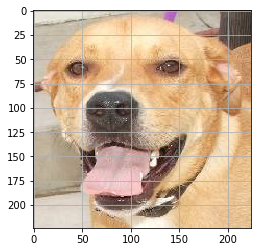

40960/35363 [==================================] - 0s 0us/step
Predicted: [('n02099712', 'Labrador_retriever', 0.78212243), ('n02093256', 'Staffordshire_bullterrier', 0.0316823), ('n02093428', 'American_Staffordshire_terrier', 0.027616356)]


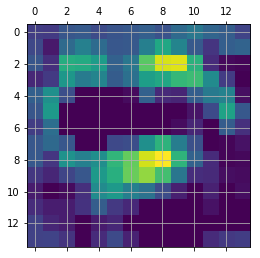

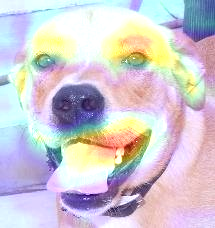

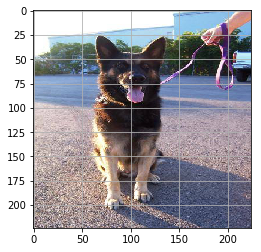

Predicted: [('n02106662', 'German_shepherd', 0.4686104), ('n02105412', 'kelpie', 0.32945493), ('n02113023', 'Pembroke', 0.09951074)]


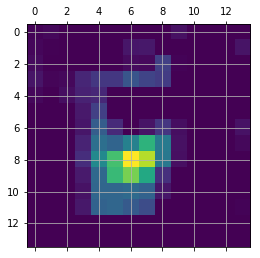

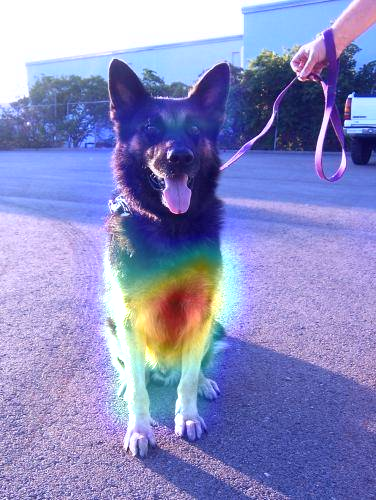

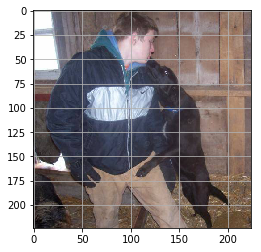

Predicted: [('n02093256', 'Staffordshire_bullterrier', 0.2842467), ('n02097130', 'giant_schnauzer', 0.08879051), ('n02106550', 'Rottweiler', 0.069548525)]


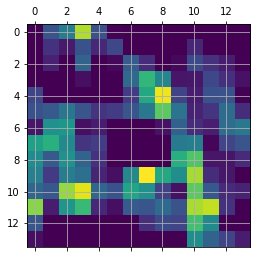

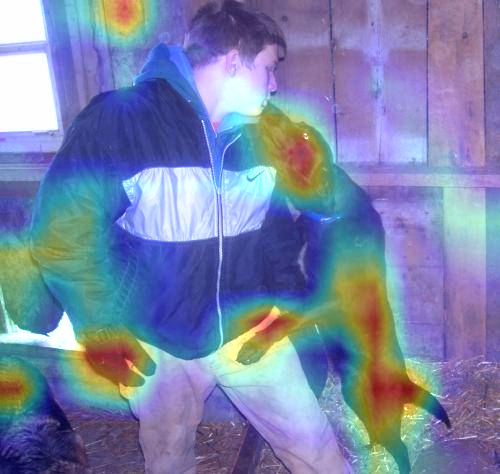

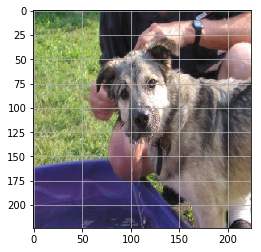

Predicted: [('n02106662', 'German_shepherd', 0.59168065), ('n02090721', 'Irish_wolfhound', 0.15991025), ('n02091635', 'otterhound', 0.038694885)]


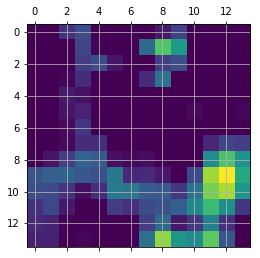

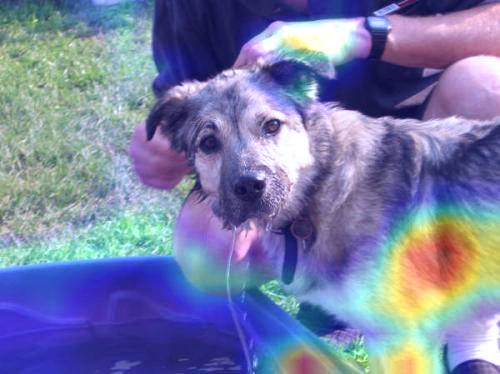

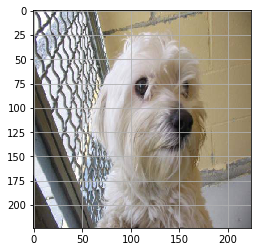

Predicted: [('n02098286', 'West_Highland_white_terrier', 0.7997436), ('n02085936', 'Maltese_dog', 0.14729013), ('n02098105', 'soft-coated_wheaten_terrier', 0.013409595)]


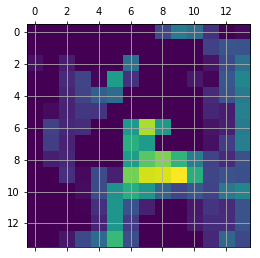

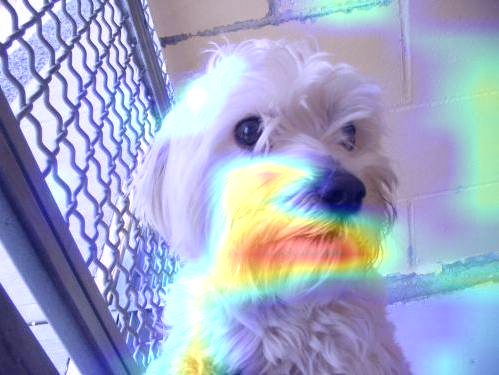

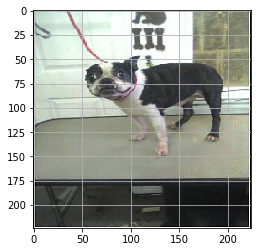

Predicted: [('n02096585', 'Boston_bull', 0.82253414), ('n02108915', 'French_bulldog', 0.07625381), ('n02085620', 'Chihuahua', 0.026841762)]


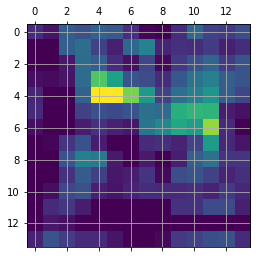

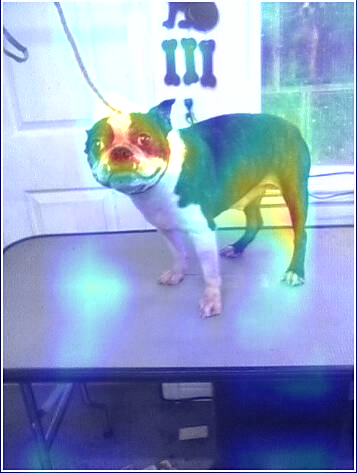

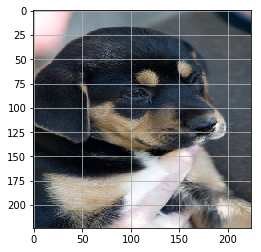

Predicted: [('n02106550', 'Rottweiler', 0.79134333), ('n02108000', 'EntleBucher', 0.06905422), ('n02105412', 'kelpie', 0.041383035)]


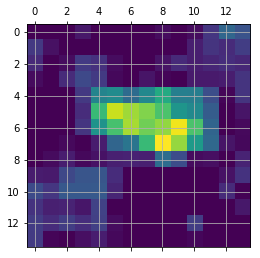

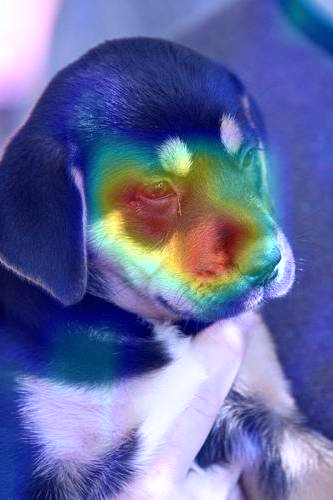

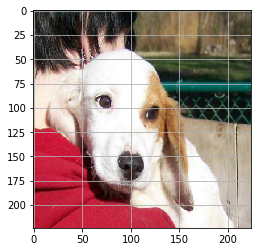

Predicted: [('n02089867', 'Walker_hound', 0.19462296), ('n02100735', 'English_setter', 0.1045118), ('n02091831', 'Saluki', 0.1034402)]


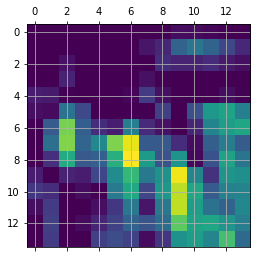

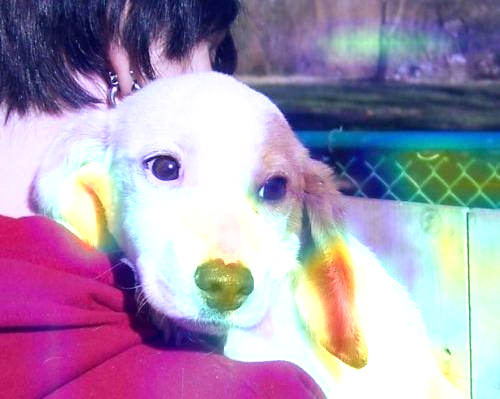

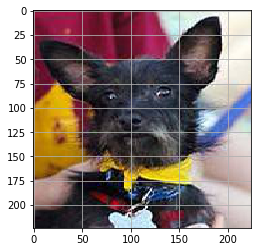

Predicted: [('n02097298', 'Scotch_terrier', 0.8068917), ('n02096177', 'cairn', 0.15354937), ('n02094258', 'Norwich_terrier', 0.009986813)]


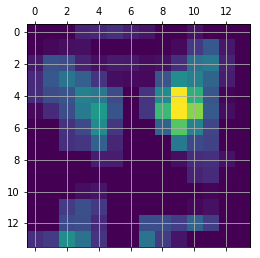

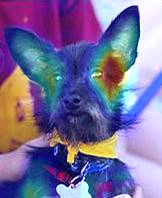

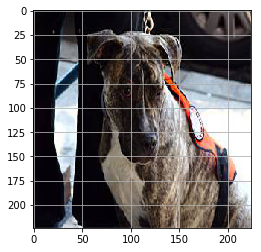

Predicted: [('n02109047', 'Great_Dane', 0.7565862), ('n02100236', 'German_short-haired_pointer', 0.043027308), ('n02108089', 'boxer', 0.03278864)]


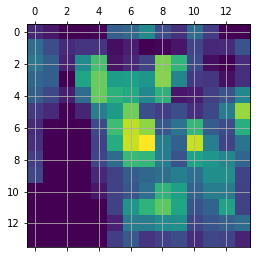

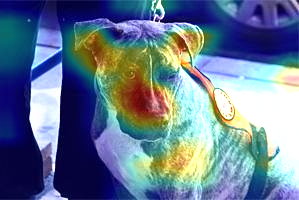

In [9]:
process_image(dog_img1)
process_image(dog_img2)
process_image(dog_img3)
process_image(dog_img4)
process_image(dog_img5)
process_image(dog_img6)
process_image(dog_img7)
process_image(dog_img8)
process_image(dog_img9)
process_image(dog_img10)
